# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
#%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [3]:
# Set monthly household income at 12000
# YOUR CODE HERE!
monthly_income = 12000

### Collect Crypto Prices Using the `requests` Library

In [4]:
#Assume the following amount of crypto assets: 1.2 BTC and 5.3 ETH.
#Create a variable called monthly_income and set its value to 12000.
#Use the requests library to fetch the current price in US dollars of bitcoin (BTC) and ethereum (ETH) using the API endpoints provided.
#Parse the API JSON response to pick the crypto prices and store each price in a variable.
#Compute the value in US dollars of the current amount of cryptocurrencies and print the results.

In [5]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [7]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_price = requests.get(btc_url).json()
#print(json.dumps(btc_price,indent=4))
# Fetch current ETH price
# YOUR CODE HERE!]
eth_price = requests.get(eth_url).json()
#print(json.dumps(eth_price,indent=4))

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price["data"]["1"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_price["data"]["1027"]["quotes"]["USD"]["price"]
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $15435.07
The current value of your 5.3 ETH is $2158.48


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)
###### Assume the following amount of shares: 200 AGG (bonds) and 50 SPY (stocks).

In [8]:
#Create the Alpaca API object using the tradeapi.REST function from the Alpaca SDK.
#Format the current date as ISO format. You may change the date set in the starter code to Today's date.
#Get the current closing prices for SPY and AGG using the Alpaca's get_barset() function. Transform the function's response to a Pandas DataFrame.
#Pick the SPY and AGG close prices from the Alpaca's get_barset() DataFrame response and store them as Python variables. Print the closing values for validation.
#Compute the value in US dollars of the current amount of shares and print the results.

In [9]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key= os.getenv("ALPACA_API_KEY")
alpaca_secret_key= os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')


In [13]:
# Format current date as ISO format
# YOUR CODE HERE!
today= pd.Timestamp("2020-10-20", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
# YOUR CODE HERE!
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.64
Current SPY closing price: $343.34


In [14]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
value_share = my_spy_value + my_agg_value
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17167.00
The current value of your 200 AGG shares is $23528.00


### Savings Health Analysis

In [15]:
#To analyze savings health, create a DataFrame called df_savings with two rows. Store the total value in US dollars of the crypto assets in the first row and the total value of the shares in the second row.
#Use the df_savings DataFrame to plot a pie chart to visualize the composition of personal savings.
#Use if conditional statements to validate if the current savings are enough for an emergency fund. An ideal emergency fund should be equal to three times your monthly income.
#########If total savings are greater than the emergency fund, display a message congratulating the person for having enough money in this fund.
#########If total savings are equal to the emergency fund, display a message congratulating the person on reaching this financial goal.
#########If total savings are less than the emergency fund, display a message showing how many dollars away the person is to reach the goal of saving at least three times their monthly expenses.


In [16]:
combined_value = my_btc_value + my_eth_value

In [17]:
# Create savings DataFrame
# YOUR CODE HERE!
fh_data = [value_share, combined_value]
df_savings = pd.DataFrame(fh_data, index= ["Shares", "Crypto"], columns= ["Amount"])
# Display savings DataFrame
display(df_savings)

,Amount
Shares,40695.00
Crypto,17593.55


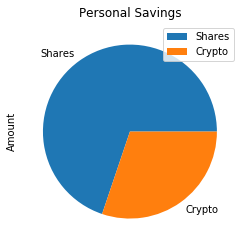

In [45]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="Amount", title= "Personal Savings")

In [19]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = df_savings.sum()
total_savings= total_savings["Amount"]
total_savings_needed = total_savings-emergency_fund
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congradulations for having enough money in this fund!")
elif total_savings == emergency_fund:
    print("Congradulations for having enough money in this fund!")
elif total_savings < emergency_fund:
    print(f"You are $(needed) of your goal for monthly expense")

Congradulations for having enough money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
tickers = ["AGG", "SPY"]
timeframe= '1D'
df_stock_data= api.get_barset(
    tickers,
    timeframe,
    start= start_date,
    end= end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
time                                                          
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_fc = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 500,
    num_trading_days = 252*30
)

In [23]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_fc.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_fc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996613,1.002540,0.996949,0.995297,0.992126,0.988832,0.995876,0.991521,0.991590,0.998738,...,1.002967,1.000436,1.005179,0.998582,1.006653,0.999837,0.995800,1.003315,0.998327,1.000282
2,0.997427,1.009579,0.994086,0.987818,0.991018,0.988539,0.982140,0.985633,0.995820,0.986309,...,1.006568,1.005538,1.000703,0.999794,1.005369,0.995427,1.001409,0.993508,0.992841,0.990224
3,0.985162,1.015646,0.992922,0.987746,0.992604,0.990349,0.990459,0.980719,1.005924,0.982851,...,1.006935,1.005013,0.995890,0.998154,1.004579,0.995833,0.983996,0.993946,0.995877,0.992703
4,0.982246,1.010062,0.999249,0.994308,0.995667,0.977837,0.994036,0.980923,1.011937,0.992996,...,1.002181,1.010190,0.980101,0.992646,1.004426,0.996813,0.989721,0.987821,1.004139,1.003230
5,0.988022,1.003159,1.003360,0.997225,1.005109,0.979933,0.997941,0.976909,1.016090,0.997495,...,1.013957,1.010136,0.973801,1.002587,1.005202,1.002717,0.991446,0.990700,0.996643,0.996139
6,0.985835,1.010263,0.999220,0.995761,1.006759,0.976783,0.993592,0.967774,1.009416,0.997214,...,1.016176,1.010646,0.979535,1.006747,1.004457,1.005563,0.991429,0.987175,0.981714,0.989497
7,0.981923,1.010603,0.998475,0.992574,1.015424,0.968991,0.994935,0.969525,1.003736,0.997666,...,1.014688,1.011792,0.977922,1.012180,1.005938,1.012290,0.989496,0.989841,0.974405,0.990754
8,0.986088,1.009696,0.989203,0.992414,1.015935,0.968195,0.981944,0.967032,0.998844,0.998093,...,1.011947,1.001579,0.974367,1.008686,1.008287,1.007004,0.984100,0.992378,0.977608,0.996720
9,0.983335,1.009918,0.992760,1.000180,1.018427,0.972555,0.973526,0.959262,0.990899,0.999143,...,1.012172,1.004633,0.971740,1.007015,1.008690,1.013081,0.995515,0.988114,0.977664,0.988979


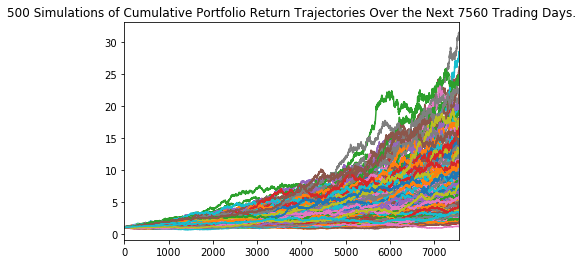

In [25]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_fc.plot_simulation()

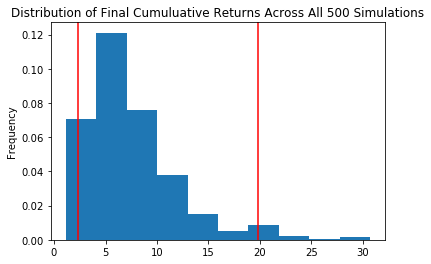

In [26]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dc_plot = MC_fc.plot_distribution()

### Retirement Analysis

In [27]:
#Fetch the summary statistics from the Monte Carlo simulation results to answer the following questions:
    ###Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?
    ###How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_fc.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              7.471594
std               4.404586
min               1.141241
25%               4.432959
50%               6.461324
75%               9.146023
max              30.714673
95% CI Lower      2.296690
95% CI Upper     19.824853
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower=round(tbl[8]*20000,2)
ci_upper=round(tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $45933.81 and $396497.07


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [31]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower=round(tbl[8]*30000*1.5,2)
ci_upper=round(tbl[9]*30000*1.5,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $103351.06 and $892118.4


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fc = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 500,
    num_trading_days = 252*5
)

In [33]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996357,1.005658,1.008807,0.993509,0.995684,0.996884,0.994462,0.989979,0.993620,0.993185,...,1.001042,0.997276,0.996434,0.991351,1.002597,0.998201,1.000150,1.001149,0.987315,0.996567
2,0.993861,0.997891,1.001571,0.995497,1.000796,0.995820,0.989171,0.990075,0.997865,0.988750,...,0.996950,0.999984,0.991799,0.999672,1.000196,1.002592,1.003444,1.000019,0.985636,0.993468
3,0.991923,1.003432,1.011539,0.995020,0.996473,0.986363,0.991881,0.982396,0.998854,0.986343,...,0.986895,1.000170,0.985815,1.017765,1.008192,0.993629,0.985349,1.007864,0.987799,0.992181
4,0.996499,1.008768,1.023924,1.000076,1.010139,0.990854,0.993497,0.981550,0.994265,0.992810,...,0.994367,1.001003,0.987289,1.018582,1.008107,1.006375,1.000587,1.006672,0.984018,0.995658
5,0.994820,1.014999,1.021970,1.021078,1.012107,0.988723,0.991321,0.985535,0.995534,0.998372,...,0.997554,1.009042,0.991483,1.030605,1.003303,1.012524,0.997870,0.997623,0.985314,0.990692
6,0.986362,1.016906,1.015902,1.013973,1.023102,0.974918,0.984665,0.990931,0.987221,0.991298,...,0.989979,1.009546,0.986866,1.032358,1.008739,1.014845,0.993741,1.007727,0.986959,0.981988
7,0.989823,1.015055,1.014101,1.022323,1.039423,0.968985,0.983300,0.996530,0.993813,0.988055,...,0.988685,1.009005,0.977570,1.033828,1.005488,1.015344,0.993561,1.003393,0.994233,0.972254
8,0.988217,1.012854,1.010874,1.020044,1.044101,0.957112,0.968410,1.006421,0.991651,0.988292,...,0.983125,1.008424,0.980915,1.044551,1.005400,1.023984,0.992594,1.015506,0.995321,0.973259
9,0.983422,1.008145,1.014542,1.023526,1.035915,0.956435,0.960862,1.005630,0.984861,0.988198,...,0.986735,1.009980,0.989522,1.047415,0.999453,1.020869,1.000456,1.009423,1.002799,0.974218


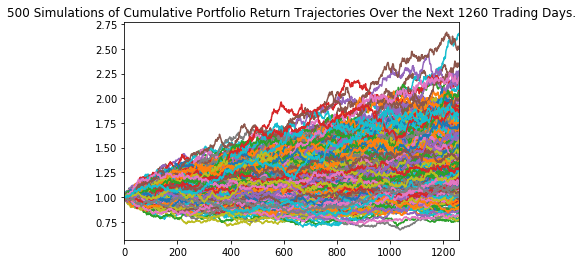

In [35]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_fc.plot_simulation()

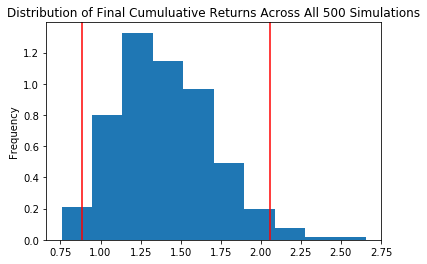

In [36]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dc_plot = MC_fc.plot_distribution()

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_five = MC_fc.summarize_cumulative_return()
# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.399347
std               0.305405
min               0.757036
25%               1.174365
50%               1.364497
75%               1.596246
max               2.656385
95% CI Lower      0.883548
95% CI Upper      2.056114
Name: 1260, dtype: float64


In [43]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five=round(tbl[8]*60000,2)
ci_upper_five=round(tbl[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $137801.42 and $1189491.2


### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_fc = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 500,
    num_trading_days = 252*10
)

In [34]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_fc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992750,1.004602,1.002171,1.007973,1.000654,0.997739,0.993959,0.998808,1.000346,1.002739,...,1.005447,0.991941,0.995614,0.997777,1.005498,1.001310,0.996346,1.002910,1.003285,0.996446
2,0.995419,1.006137,0.995033,1.018802,0.999154,0.987551,0.989451,1.005490,1.003259,1.002800,...,1.013861,0.980874,0.989754,0.998049,1.006982,0.998616,1.000039,0.990697,1.012069,1.000817
3,0.995014,1.012548,0.993968,1.015330,1.014315,0.995699,0.991786,1.008036,1.013863,1.005953,...,1.011279,0.978111,0.994908,1.003431,0.995800,0.996380,1.000690,0.991989,1.012315,0.999773
4,0.992089,1.011131,0.987000,1.021480,1.015411,1.000778,0.996951,1.005924,1.021761,1.000296,...,1.012720,0.984913,0.998819,1.009645,1.002916,0.986289,0.995106,0.993415,1.017882,1.004471
5,0.996441,1.010155,0.985710,1.016535,1.013093,0.995487,0.994068,1.014281,1.028279,1.002481,...,1.018088,0.991066,1.005672,1.015148,1.001206,0.994834,0.996438,0.993486,1.016982,1.004445
6,0.990007,1.011135,0.973794,1.014508,1.020643,1.004118,1.003766,1.014581,1.024457,0.996439,...,1.026085,0.994258,1.008926,1.012928,1.008949,0.986956,0.995361,0.990929,1.019595,0.993259
7,0.989882,1.014715,0.986204,1.018047,1.023020,1.007976,0.999902,1.010694,1.028206,0.989706,...,1.023554,0.990270,1.011464,1.016407,1.002971,0.981002,0.994257,0.988332,1.017843,1.005675
8,0.990127,1.016042,0.991528,1.014363,1.030629,1.008748,0.998474,1.010826,1.029389,0.981276,...,1.034450,1.002311,1.024821,1.009599,1.011480,0.991677,1.004847,0.982149,1.007708,1.014792
9,0.998853,1.031234,1.005034,1.009132,1.025288,1.009979,1.000704,1.011806,1.033201,0.982997,...,1.031739,1.010057,1.045423,0.997132,0.998841,0.979137,1.010323,0.982596,1.020620,1.010995


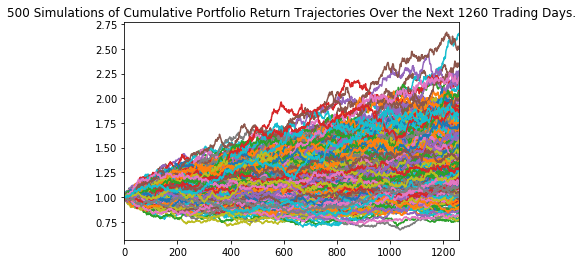

In [39]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_fc.plot_simulation()

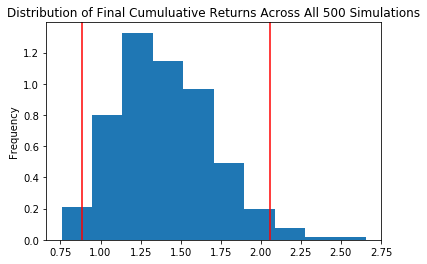

In [40]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dc_plot = MC_fc.plot_distribution()

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_ten = MC_fc.summarize_cumulative_return()
# Print summary statistics
print(tbl_ten)

count           500.000000
mean              1.399347
std               0.305405
min               0.757036
25%               1.174365
50%               1.364497
75%               1.596246
max               2.656385
95% CI Lower      0.883548
95% CI Upper      2.056114
Name: 1260, dtype: float64


In [44]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten=round(tbl[8]*20000,2)
ci_upper_ten=round(tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $45933.81 and $396497.07
